In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# using sample data from https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/sample_data/percent_bachelors_degrees_women_usa.csv
file_name = "../data/percent_bachelors_degrees_women_usa.csv"

In [62]:
# extract extension
extension = file_name.rsplit('.', 1)[1].lower() 

# process into dataframe
if extension == 'csv':
    df = pd.read_csv(file_name) 

or example, with demographic data, we we generally consider correlations above 0.75 to be relatively strong; correlations between 0.45 and 0.75 are moderate, and those below 0.45 are considered weak.

In [63]:
# find correlations
corrs = pd.DataFrame(df.corr().abs().unstack().sort_values(kind="quicksort"))

# remove correlations of 1
corrs = corrs[corrs[0] < 1]

# extract highest correlation
highest_corr = round(corrs.iloc[-1][0], 2)
highest_corr_y = corrs.iloc[-1].name[0]
highest_corr_x = corrs.iloc[-1].name[1]

# compute whether it's a strong correlation
if highest_corr > 0.75:
    correlation_strength = 'high'
elif highest_corr > 0.45:
    correlation_strength = 'moderate'
else:
    correlation_strength = 'weak'

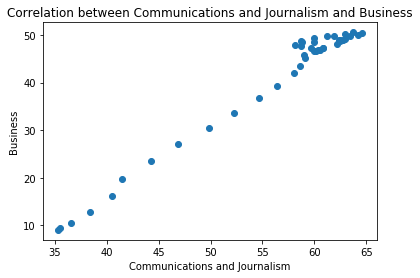

In [64]:
plt.scatter(df[highest_corr_x], df[highest_corr_y])
plt.title(f'Correlation between {highest_corr_x} and {highest_corr_y}')
plt.xlabel(highest_corr_x)
plt.ylabel(highest_corr_y)
plt.show()

In [65]:
print(f'There is a {correlation_strength} correlation between {highest_corr_x} and {highest_corr_y}.')

There is a high correlation between Communications and Journalism and Business.
